# Exploratory Data Analysis of Covid-19 Vaccine Clinical Trials

Xinxin

15-Jan-2021 (Last update: 10-Feb-2021)

-----
__Requirements:__
- Find an API that gives you data
- Tell a story that you find interesting and fun

__Data API chosen:__ API to clinicaltrials.gov

__Objective__: to understand the clinical trials related to COVID19 vaccines.

Since Q4 2020, COVID vaccines developed by different companies with different mechanisms have been approved and launched. Since then, many countries have started to administer the vaccine to the general public. However, more daily cases have been reported in many parts of the world recently, due to the mutations in the virus as well as the colder weather. In this assignment, we would like to analyze the clinical trials related to COVID19 vaccines.

The data was taken from clinicaltrials.gove, which is one of the most famous clinical trial website governed by the US National Institutes of Health.

## 1. Inject the Data

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# retrieve data from clinicaltrials.gov for selected fields
# return is the search result of expression = covid19 AND vaccine
df_all = requests.get('https://clinicaltrials.gov/api/query/study_fields?expr=covid19+AND+vaccine&fields=NCTId%2CBriefTitle%2CCondition%2C+Keyword%2CStudyType%2C+Phase%2C+DesignPrimaryPurpose%2C+EnrollmentCount%2C+InterventionType%2C+InterventionName%2C+Gender%2C+StdAge%2C+LocationCountry%2COrgFullName%2C+OverallStatus%2C+StartDate%2C+CompletionDate%2C+IsFDARegulatedDrug%2C+ArmGroupType&min_rnk=1&max_rnk=500&fmt=json')

In [9]:
df_all = df_all.json()

In [15]:
# convert json into a dataframe
df_detail = pd.json_normalize(df_all['StudyFieldsResponse']['StudyFields']) 
df_detail.head()

,Rank,NCTId,BriefTitle,Condition,Keyword,StudyType,Phase,DesignPrimaryPurpose,EnrollmentCount,InterventionType,InterventionName,Gender,StdAge,LocationCountry,OrgFullName,OverallStatus,StartDate,CompletionDate,IsFDARegulatedDrug,ArmGroupType
0,1,[NCT04568811],[The Phase I Clinical Trial of Booster Vaccina...,[Adenovirus Type-5 Vectored COVID-19 Vaccine],[],[Interventional],[Phase 1],[Prevention],[89],[Biological],[Adenovirus Type-5 Vectored COVID-19 Vaccine],[All],"[Child, Adult, Older Adult]",[China],[Jiangsu Province Centers for Disease Control ...,"[Active, not recruiting]","[September 26, 2020]","[September 27, 2021]",[No],[Experimental]
1,2,[NCT04497298],[Clinical Trial to Evaluate the Safety and Imm...,[COVID-19],"[SARS-CoV-2, Vaccine, Prevention]",[Interventional],[Phase 1],[Prevention],[90],"[Biological, Biological, Biological, Other]",[Two COVID-19 vaccine candidate (TMV-083) admi...,[All],[Adult],"[Belgium, France]",[Institut Pasteur],[Recruiting],"[August 10, 2020]",[October 2021],[No],"[Experimental, Experimental, Experimental, Pla..."
2,3,[NCT04713163],[COVID-19 Vaccine Induced Immunity],[Covid19],[],[Observational],[],[],[200],[Drug],[covid19 vaccine],[All],"[Adult, Older Adult]",[],[University of Manitoba],[Not yet recruiting],[January 2021],[December 2021],[Yes],[]
3,4,[NCT04659941],[Use of BCG Vaccine as a Preventive Measure fo...,[COVID 19 Vaccine],"[COVID 19, BCG vaccine]",[Interventional],[Phase 2],[Prevention],[1000],[Biological],[BCG vaccine],[All],"[Adult, Older Adult]",[Brazil],[Universidade Federal do Rio de Janeiro],[Recruiting],"[October 1, 2020]","[October 1, 2022]",[No],"[Experimental, Placebo Comparator]"
4,5,[NCT04651790],"[Efficacy, Safety, and Immunogenicity of an In...","[Covid19, Vaccines]","[Clinical trials, Covid19, Inactivated vaccine]",[Interventional],[Phase 3],[Prevention],[2300],"[Biological, Other]","[SARS-CoV-2 inactivated vaccine, Placebo]",[All],"[Adult, Older Adult]",[Chile],[Pontificia Universidad Catolica de Chile],[Recruiting],"[November 27, 2020]",[March 2022],[No],"[Active Comparator, Placebo Comparator]"


## 2. Data Cleaning

Cleaning the format of the dataframe

For columns with only one single value, flatten the list inside each cell:
- `NCTId`
- `BriefTitle`
- `StudyType`
- `DesignPrimaryPurpose`
- `EnrollmentCount`
- `Gender`
- `OrgFullName`
- `OverallStatus`
- `StartDate`
- `CompletionDate`
- `IsFDARegulatedDrug`

In [16]:
for i in range(len(df_detail)):
    if len(df_detail.NCTId.iloc[i]) == 0:
        df_detail.NCTId.iloc[i] = 'Unknown'
    else:
        df_detail.NCTId.iloc[i] = df_detail.NCTId.iloc[i][0]
        
    if len(df_detail.BriefTitle.iloc[i]) == 0:
        df_detail.BriefTitle.iloc[i] = 'Unknown'
    else:
        df_detail.BriefTitle.iloc[i] = df_detail.BriefTitle.iloc[i][0]
        
    if len(df_detail.StudyType.iloc[i]) == 0:
        df_detail.StudyType.iloc[i] = 'Unknown'
    else:
        df_detail.StudyType.iloc[i] = df_detail.StudyType.iloc[i][0]
        
    if len(df_detail.DesignPrimaryPurpose.iloc[i]) == 0:
        df_detail.DesignPrimaryPurpose.iloc[i] = 'Unknown'
    else:
        df_detail.DesignPrimaryPurpose.iloc[i] = df_detail.DesignPrimaryPurpose.iloc[i][0]
    
    if len(df_detail.EnrollmentCount.iloc[i]) == 0:
        df_detail.EnrollmentCount.iloc[i] = 'Unknown'
    else:
        df_detail.EnrollmentCount.iloc[i] = df_detail.EnrollmentCount.iloc[i][0]
    
    if len(df_detail.Gender.iloc[i]) == 0:
        df_detail.Gender.iloc[i] = 'Unknown'
    else:
        df_detail.Gender.iloc[i] = df_detail.Gender.iloc[i][0]
    
    if len(df_detail.OrgFullName.iloc[i]) == 0:
        df_detail.OrgFullName.iloc[i] = 'Unknown'
    else:
        df_detail.OrgFullName.iloc[i] = df_detail.OrgFullName.iloc[i][0]
    
    if len(df_detail.OverallStatus.iloc[i]) == 0:
        df_detail.OverallStatus.iloc[i] = 'Unknown'
    else:
        df_detail.OverallStatus.iloc[i] = df_detail.OverallStatus.iloc[i][0]
    
    if len(df_detail.StartDate.iloc[i]) == 0:
        df_detail.StartDate.iloc[i] = 'Unknown'
    else:
        df_detail.StartDate.iloc[i] = df_detail.StartDate.iloc[i][0]
    
    if len(df_detail.CompletionDate.iloc[i]) == 0:
        df_detail.CompletionDate.iloc[i] = 'Unknown'
    else:
        df_detail.CompletionDate.iloc[i] = df_detail.CompletionDate.iloc[i][0]
    
    if len(df_detail.IsFDARegulatedDrug.iloc[i]) == 0:
        df_detail.IsFDARegulatedDrug.iloc[i] = 'Unknown'
    else:
        df_detail.IsFDARegulatedDrug.iloc[i] = df_detail.IsFDARegulatedDrug.iloc[i][0]
    

/Users/iris.xx/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
df_detail.head()

,Rank,NCTId,BriefTitle,Condition,Keyword,StudyType,Phase,DesignPrimaryPurpose,EnrollmentCount,InterventionType,InterventionName,Gender,StdAge,LocationCountry,OrgFullName,OverallStatus,StartDate,CompletionDate,IsFDARegulatedDrug,ArmGroupType
0,1,NCT04568811,The Phase I Clinical Trial of Booster Vaccinat...,[Adenovirus Type-5 Vectored COVID-19 Vaccine],[],Interventional,[Phase 1],Prevention,89,[Biological],[Adenovirus Type-5 Vectored COVID-19 Vaccine],All,"[Child, Adult, Older Adult]",[China],Jiangsu Province Centers for Disease Control a...,"Active, not recruiting","September 26, 2020","September 27, 2021",No,[Experimental]
1,2,NCT04497298,Clinical Trial to Evaluate the Safety and Immu...,[COVID-19],"[SARS-CoV-2, Vaccine, Prevention]",Interventional,[Phase 1],Prevention,90,"[Biological, Biological, Biological, Other]",[Two COVID-19 vaccine candidate (TMV-083) admi...,All,[Adult],"[Belgium, France]",Institut Pasteur,Recruiting,"August 10, 2020",October 2021,No,"[Experimental, Experimental, Experimental, Pla..."
2,3,NCT04713163,COVID-19 Vaccine Induced Immunity,[Covid19],[],Observational,[],Unknown,200,[Drug],[covid19 vaccine],All,"[Adult, Older Adult]",[],University of Manitoba,Not yet recruiting,January 2021,December 2021,Yes,[]
3,4,NCT04659941,Use of BCG Vaccine as a Preventive Measure for...,[COVID 19 Vaccine],"[COVID 19, BCG vaccine]",Interventional,[Phase 2],Prevention,1000,[Biological],[BCG vaccine],All,"[Adult, Older Adult]",[Brazil],Universidade Federal do Rio de Janeiro,Recruiting,"October 1, 2020","October 1, 2022",No,"[Experimental, Placebo Comparator]"
4,5,NCT04651790,"Efficacy, Safety, and Immunogenicity of an Ina...","[Covid19, Vaccines]","[Clinical trials, Covid19, Inactivated vaccine]",Interventional,[Phase 3],Prevention,2300,"[Biological, Other]","[SARS-CoV-2 inactivated vaccine, Placebo]",All,"[Adult, Older Adult]",[Chile],Pontificia Universidad Catolica de Chile,Recruiting,"November 27, 2020",March 2022,No,"[Active Comparator, Placebo Comparator]"


## 3. Exploratory Data Analysis

### 3.1 Clinical trials status and phases

To visualize phase of clinical trials and their status.

In [18]:
import seaborn as sns

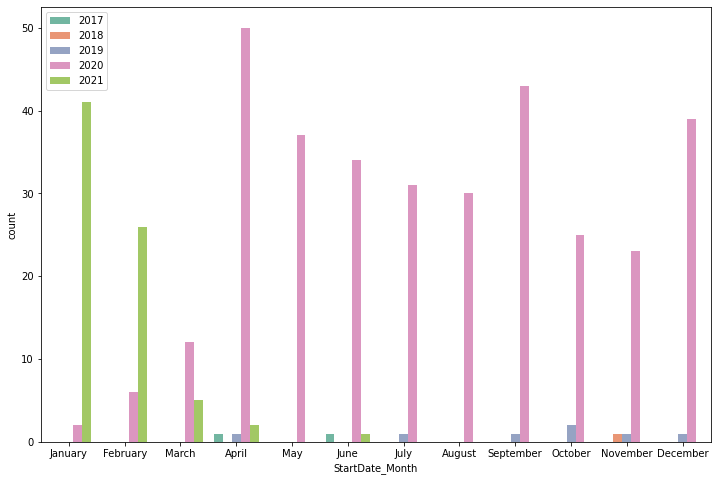

In [19]:
# split the StartDate by Month - Day - Year
df_detail['StartDate_Month'] = [date.split()[0] for date in df_detail.StartDate]
df_detail['StartDate_Year'] = [int(date.split()[-1]) for date in df_detail.StartDate]

# plot the distribution of start date in year and month
plt.rcParams['figure.figsize'] = [12, 8]

sns.countplot(df_detail.StartDate_Month, hue = df_detail.StartDate_Year,
             order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                     'September', 'October', 'November', 'December'], palette = 'Set2')
plt.legend(loc='upper left')

In [20]:
# check those clinical trials started before 2020, before the pandemic started
df_detail[df_detail.StartDate_Year <= 2019]

,Rank,NCTId,BriefTitle,Condition,Keyword,StudyType,Phase,DesignPrimaryPurpose,EnrollmentCount,InterventionType,...,StdAge,LocationCountry,OrgFullName,OverallStatus,StartDate,CompletionDate,IsFDARegulatedDrug,ArmGroupType,StartDate_Month,StartDate_Year
188,189,NCT04160975,Persuasion in Medicine: Experimental Evidence ...,"[Flu, Human, Influenza, Human, Covid19]","[Belief Updating, Preventive Care, Racial Disp...",Interventional,[Not Applicable],Health Services Research,3350,"[Behavioral, Behavioral]",...,[Adult],[United States],Harvard University,Enrolling by invitation,"December 20, 2019","February 15, 2021",No,"[Experimental, Experimental, Experimental, Exp...",December,2019
223,224,NCT04025580,Systems Analyses of the Immune Response to the...,"[Healthy Volunteer, COVID-19]","[Systems Biology, Immunology]",Interventional,[Phase 2],Basic Science,300,"[Biological, Biological, Biological]",...,"[Adult, Older Adult]",[United States],National Institutes of Health Clinical Center ...,Recruiting,"October 2, 2019","December 31, 2025",No,[Experimental],October,2019
237,238,NCT03209713,Edtech-HPV: A Community Approach Using Educati...,[Parents],"[Mexican, Mexican-American, 17-336]",Interventional,[Not Applicable],Prevention,800,"[Behavioral, Behavioral]",...,"[Adult, Older Adult]","[United States, United States, United States, ...",Memorial Sloan Kettering Cancer Center,Recruiting,"June 28, 2017",June 2022,No,"[Active Comparator, Experimental]",June,2017
238,239,NCT04061382,Sero-epidemiological Survey of England in 2019...,"[Serogroup C Meningococcal Meningitis, Diphthe...",[],Observational,[],Unknown,3800,"[Procedure, Procedure]",...,"[Child, Adult]",[United Kingdom],University of Oxford,Recruiting,"October 15, 2019","June 30, 2021",No,[],October,2019
332,333,NCT04441814,FOUND - Ancillary Study to Smile Protocol NCT0...,"[COVID 19, Inflammatory Status]","[COVID, Lung cancer screening, Subsolid pulmon...",Observational,[],Unknown,960,[],...,"[Adult, Older Adult]",[Italy],Fondazione IRCCS Istituto Nazionale dei Tumori...,Enrolling by invitation,"July 23, 2019",July 2021,No,[],July,2019
343,344,NCT04534595,Data Collection on the Model Schools Pediatric...,[COVID-19 Experience],"[COVID-19, School-based health center, mental ...",Observational,[],Unknown,1500,[Other],...,[Child],[Canada],Unity Health Toronto,Recruiting,"April 30, 2019",March 2021,No,[],April,2019
363,364,NCT03734237,A Pragmatic Assessment of Influenza Vaccine Ef...,"[Influenza, Influenza-like Illness]",[Influenza vaccine],Interventional,[Phase 4],Prevention,15000,"[Biological, Biological, Biological]",...,"[Adult, Older Adult]","[United States, United States, United States, ...",Henry M. Jackson Foundation for the Advancemen...,Recruiting,"November 6, 2018","May 31, 2022",Yes,"[Active Comparator, Active Comparator, Active ...",November,2018
371,372,NCT03885232,Presumptively Initiating Vaccines and Optimizi...,[Preventive Health Services (PREV HEALTH SERV)],"[Communication, Immunization]",Interventional,[Not Applicable],Health Services Research,1000,"[Behavioral, Other]",...,[Child],"[United States, United States]","University of Colorado, Denver",Enrolling by invitation,"September 1, 2019","July 31, 2023",No,"[Experimental, Active Comparator]",September,2019
397,398,NCT03102034,"Evaluating the Infectivity, Safety, and Immuno...",[Respiratory Syncytial Virus Infections],[],Interventional,[Phase 1],Prevention,32,"[Biological, Biological]",...,[Child],"[United States, United States, United States, ...",National Institute of Allergy and Infectious D...,Completed,"April 6, 2017","May 25, 2018",Yes,"[Experimental, Placebo Comparator]",April,2017
414,415,NCT04237883,Primary Care Clinical Excellence Incentive Study,"[Behavioral Economics, Primary Health Care, He...","[Behavioral Economics, Primary Health Care, He...",Interventional,[Not Applicable],Health Services Research,225,"[Behavioral, Behavioral, Behavioral]",...,"[Adult, Older Adult]",[United States],"University of Californ

After searching more details of the trials above on clinicaltrials.gov, it has been confirmed that:
- All 3 studies started in 2018 & 2017 are not relevant to COVID19
- Other than NCT03885232 & NCT04237883, studies started in 2019 are indeed relevant to COVID19.

In [21]:
# remove trials irrelevant to COVID19
df_detail = df_detail[df_detail.StartDate_Year > 2018]
df_detail = df_detail[~df_detail.NCTId.isin(['NCT03885232', 'NCT04237883'])]

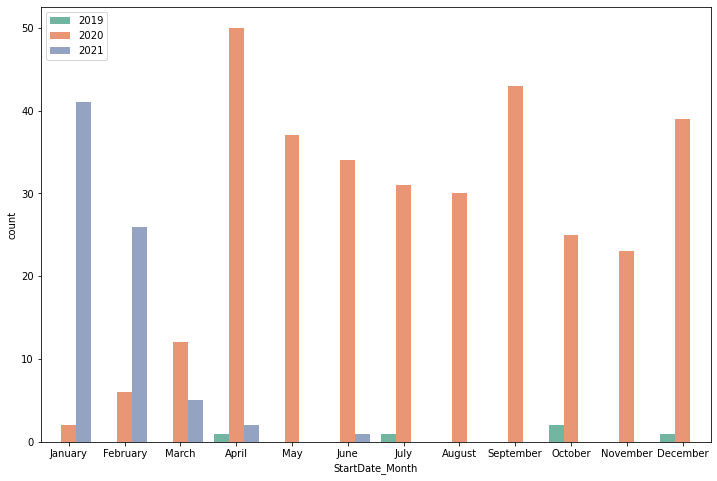

In [22]:
# verify the new set of start date after dropping any records before 2019
sns.countplot(df_detail.StartDate_Month, hue = df_detail.StartDate_Year,
             order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                     'September', 'October', 'November', 'December'], palette = 'Set2')
plt.legend(loc='upper left')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

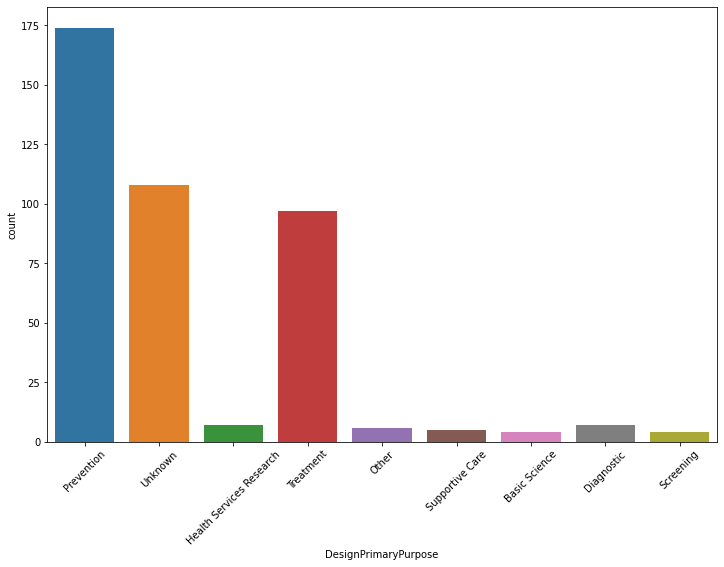

In [23]:
# Plot the various primary purpose of design
sns.countplot(df_detail.DesignPrimaryPurpose)
plt.xticks(rotation = 45)

Most of the trials are focusing on preventions (i.e. Vaccines), while some others are focusing on screening, treatment or other areas.

In [24]:
# filter the trials with objective of preventions (i.e. vaccines)
df_detail = df_detail[df_detail.DesignPrimaryPurpose == 'Prevention']

Next, examine the distribution of clinical trials by phases.

In [25]:
# flatten the list by phase - 
# for the same clinical trials with multiple phase, it will be shown as multiple records
flattened_col = pd.DataFrame([(index, value) 
                              for (index, values) in df_detail['Phase'].iteritems() for value in values],
                             columns=['index', 'Phase']).set_index('index')
df_flat = df_detail.drop('Phase', axis=1).join(flattened_col)
df_flat = df_flat.reset_index(drop = True)
df_flat.head()

,Rank,NCTId,BriefTitle,Condition,Keyword,StudyType,DesignPrimaryPurpose,EnrollmentCount,InterventionType,InterventionName,...,LocationCountry,OrgFullName,OverallStatus,StartDate,CompletionDate,IsFDARegulatedDrug,ArmGroupType,StartDate_Month,StartDate_Year,Phase
0,1,NCT04568811,The Phase I Clinical Trial of Booster Vaccinat...,[Adenovirus Type-5 Vectored COVID-19 Vaccine],[],Interventional,Prevention,89,[Biological],[Adenovirus Type-5 Vectored COVID-19 Vaccine],...,[China],Jiangsu Province Centers for Disease Control a...,"Active, not recruiting","September 26, 2020","September 27, 2021",No,[Experimental],September,2020,Phase 1
1,2,NCT04497298,Clinical Trial to Evaluate the Safety and Immu...,[COVID-19],"[SARS-CoV-2, Vaccine, Prevention]",Interventional,Prevention,90,"[Biological, Biological, Biological, Other]",[Two COVID-19 vaccine candidate (TMV-083) admi...,...,"[Belgium, France]",Institut Pasteur,Recruiting,"August 10, 2020",October 2021,No,"[Experimental, Experimental, Experimental, Pla...",August,2020,Phase 1
2,4,NCT04659941,Use of BCG Vaccine as a Preventive Measure for...,[COVID 19 Vaccine],"[COVID 19, BCG vaccine]",Interventional,Prevention,1000,[Biological],[BCG vaccine],...,[Brazil],Universidade Federal do Rio de Janeiro,Recruiting,"October 1, 2020","October 1, 2022",No,"[Experimental, Placebo Comparator]",October,2020,Phase 2
3,5,NCT04651790,"Efficacy, Safety, and Immunogenicity of an Ina...","[Covid19, Vaccines]","[Clinical trials, Covid19, Inactivated vaccine]",Interventional,Prevention,2300,"[Biological, Other]","[SARS-CoV-2 inactivated vaccine, Placebo]",...,[Chile],Pontificia Universidad Catolica de Chile,Recruiting,"November 27, 2020",March 2022,No,"[Active Comparator, Placebo Comparator]",November,2020,Phase 3
4,6,NCT04510207,"A Study to Evaluate The Efficacy, Safety and I...",[COVID-19],"[SARS-CoV-2, SARS-CoV-2 Vaccine, Coronavirus]",Interventional,Prevention,45000,"[Biological, Biological, Biological]","[Inactivated SARS-CoV-2 Vaccine (Vero cell), I...",...,"[Bahrain, Egypt, Egypt, Jordan, United Arab Em...",China National Biotec Group Company Limited,Recruiting,"July 16, 2020","September 16, 2021",No,"[Experimental, Experimental, Placebo Comparator]",July,2020,Phase 3


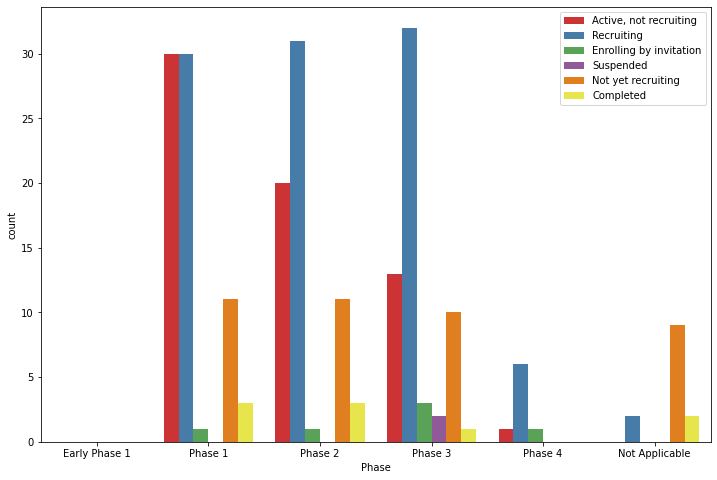

In [26]:
# plot the clinical trials by phase and status
sns.countplot(df_flat.Phase, hue = df_flat.OverallStatus,
              order = ['Early Phase 1', 'Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Not Applicable'],
             palette = 'Set1')
plt.legend(loc='upper right')

As shown in the plots above:
- There's a large number of the clinical trials in Phase 3, which means they are close to getting approval and subsequently drug launches (provided if Phase 3 result is good).
- Majority of the Phase 3 trials are ongoing or to be kick started (e.g. recruiting / active, not recruiting / not yet recruiting / enrolling by invitation), which indicates that either new vaccines are in late-stage clinical trials, or those vaccines approved are close to be approved and launched in more countries. Phase 3 clinical trials are usually conducted on large scale of patients (in the scale of hundreds or thousands) to study if the vaccine is safe and effective, as well as its common side effect.
- Around 10 Phase 4 trials can be found, which are to monitor the vaccine performance in real-world setting on patients after launch. This is important as almost all of the trials were started in 2020, leading to a very short duration to complete, comparing to the duration of normal clinical trials. Hence, it's essential to monitor if there's any severe adverse effect in real-world setting.
- Other than the large number of trials found in Phase 3, there are still many trials ongoing/planned in Phase 1 and Phase 2, which might yield promising result in vaccines in the future.

### 3.2 Clinical trial patients
 
To visualize the demographics of the patients enrolled.

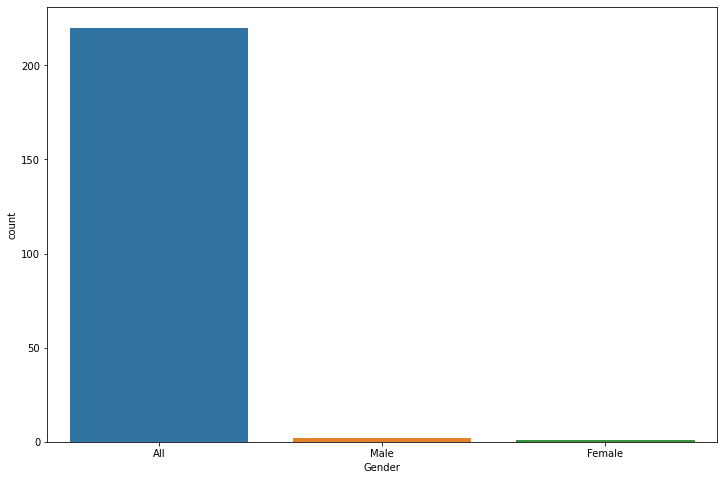

In [27]:
# plot the distribution of patients gender covered per trial
sns.countplot(df_flat.Gender)

Most of the vaccince trials are not gender-specific, and are open to recruit patients of both genders.

In [28]:
# count the unique number of trials per age group

child_id = []
adult_id = []
oldAdult_id = []

for i in range(len(df_flat)):
    # count the number of trials including children
    if any(x == 'Child' for x in df_flat.StdAge[i]) :
        child_id.append(df_flat.NCTId.iloc[i])
    else: 
        pass
    
    # count the number of trials including adult
    if any(x == 'Adult' for x in df_flat.StdAge[i]):
        adult_id.append(df_flat.NCTId.iloc[i])
    else: 
        pass
    
    # count the number of trials including older adult
    if any(x == 'Older Adult' for x in df_flat.StdAge[i]) :
        oldAdult_id.append(df_flat.NCTId.iloc[i])
    else: 
        pass

In [29]:
# find the unique count of NCT Id per list
child_id = pd.unique(child_id)
adult_id = pd.unique(adult_id)
oldAdult_id = pd.unique(oldAdult_id)

# consolidate the result
temp1 = pd.DataFrame({'Age_Grp': ['Child', 'Adult', 'Older Adult'], 
                     'Count': [int(len(child_id)), int(len(adult_id)), int(len(oldAdult_id))]})
temp1

,Age_Grp,Count
0,Child,12
1,Adult,168
2,Older Adult,133


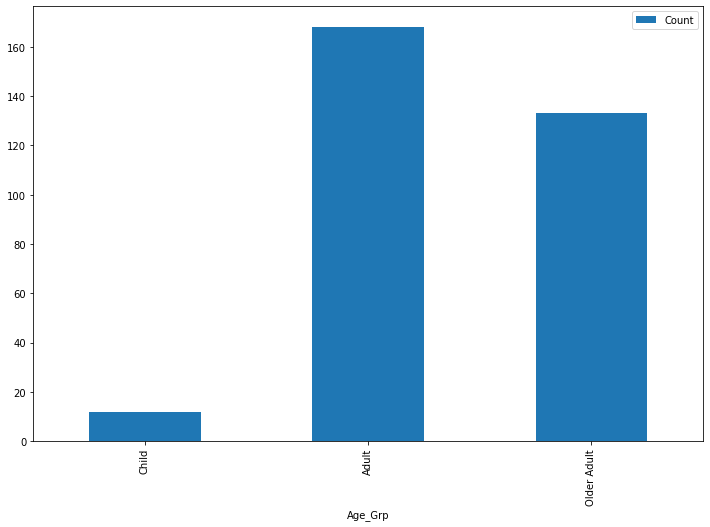

In [30]:
# plot the count of clinical trials per age group
temp1.plot.bar(y = 'Count', x = 'Age_Grp')

As shown, most of the trials are focusing on adults and older adults. However, very few are focusing on children. This can be shown by the launched COVID19 vaccines both the vaccines by Pfizer and AstraZenaca does not cover Children under 16, indicating the lack of research in COVID19 prevention in the age group of children.

### 3.3 Location of Clinical Trials

For columns like `LocationCountry`, there are more than one values in the list. Besides, further cleaning is required to remove the duplicate values in the same list, such as listed below. Such duplicates could be due to the same clinical trials conducted in multiple cities in the same country.

In [31]:
# print all LocationCountry with more than 1 elements (for the first 20 items)
# -> mostly are duplicate values
for country in df_detail.LocationCountry[:20]:
    if len(country) > 1:
        print(country)
    else:
        pass

['Belgium', 'France']
['Bahrain', 'Egypt', 'Egypt', 'Jordan', 'United Arab Emirates', 'United Arab Emirates']
['Argentina', 'Argentina', 'Argentina', 'Argentina']
['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
['Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Taiwan', 'Vietnam']
['Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey', 'Turkey']
['Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece', 'Greece']
['Brazil', 'Malaysia']
['United States', 'United States', 'United States']


In [32]:
# get the unique value of LocationCountry per clinical trial (defined by unique NCT ID)

for i in range(len(df_flat.LocationCountry)):
    temp = pd.unique(df_flat.LocationCountry.iloc[i])
    df_flat.LocationCountry.iloc[i] = temp

/Users/iris.xx/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
# flatten the list by country -
# for the same clinical trial with multiple locations, it will be shown by multiple records
flattened_col = pd.DataFrame([(index, value) 
                              for (index, values) in df_flat['LocationCountry'].iteritems() for value in values],
                             columns=['index', 'LocationCountry']).set_index('index')
df_flat2 = df_flat.drop('LocationCountry', axis=1).join(flattened_col)
df_flat2 = df_flat2.reset_index(drop = True)
df_flat2 = df_flat2.drop(['Rank'], axis = 1)
df_flat2.head()

,NCTId,BriefTitle,Condition,Keyword,StudyType,DesignPrimaryPurpose,EnrollmentCount,InterventionType,InterventionName,Gender,...,OrgFullName,OverallStatus,StartDate,CompletionDate,IsFDARegulatedDrug,ArmGroupType,StartDate_Month,StartDate_Year,Phase,LocationCountry
0,NCT04568811,The Phase I Clinical Trial of Booster Vaccinat...,[Adenovirus Type-5 Vectored COVID-19 Vaccine],[],Interventional,Prevention,89,[Biological],[Adenovirus Type-5 Vectored COVID-19 Vaccine],All,...,Jiangsu Province Centers for Disease Control a...,"Active, not recruiting","September 26, 2020","September 27, 2021",No,[Experimental],September,2020,Phase 1,China
1,NCT04497298,Clinical Trial to Evaluate the Safety and Immu...,[COVID-19],"[SARS-CoV-2, Vaccine, Prevention]",Interventional,Prevention,90,"[Biological, Biological, Biological, Other]",[Two COVID-19 vaccine candidate (TMV-083) admi...,All,...,Institut Pasteur,Recruiting,"August 10, 2020",October 2021,No,"[Experimental, Experimental, Experimental, Pla...",August,2020,Phase 1,Belgium
2,NCT04497298,Clinical Trial to Evaluate the Safety and Immu...,[COVID-19],"[SARS-CoV-2, Vaccine, Prevention]",Interventional,Prevention,90,"[Biological, Biological, Biological, Other]",[Two COVID-19 vaccine candidate (TMV-083) admi...,All,...,Institut Pasteur,Recruiting,"August 10, 2020",October 2021,No,"[Experimental, Experimental, Experimental, Pla...",August,2020,Phase 1,France
3,NCT04659941,Use of BCG Vaccine as a Preventive Measure for...,[COVID 19 Vaccine],"[COVID 19, BCG vaccine]",Interventional,Prevention,1000,[Biological],[BCG vaccine],All,...,Universidade Federal do Rio de Janeiro,Recruiting,"October 1, 2020","October 1, 2022",No,"[Experimental, Placebo Comparator]",October,2020,Phase 2,Brazil
4,NCT04651790,"Efficacy, Safety, and Immunogenicity of an Ina...","[Covid19, Vaccines]","[Clinical trials, Covid19, Inactivated vaccine]",Interventional,Prevention,2300,"[Biological, Other]","[SARS-CoV-2 inactivated vaccine, Placebo]",All,...,Pontificia Universidad Catolica de Chile,Recruiting,"November 27, 2020",March 2022,No,"[Active Comparator, Placebo Comparator]",November,2020,Phase 3,Chile


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 <a list of 55 Text major ticklabel objects>)

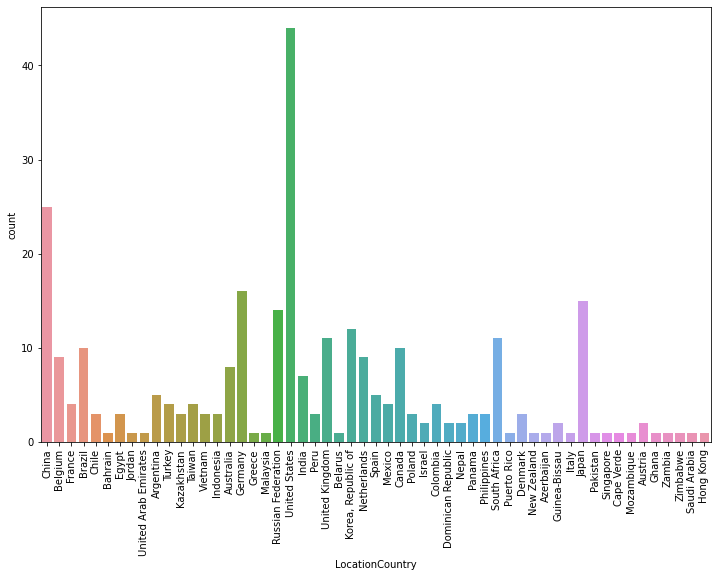

In [34]:
# plot the trials per country
sns.countplot(df_flat2.LocationCountry)
plt.xticks(rotation=90)

In [35]:
# consolidate the country-level count into a dataframe
country_count = pd.DataFrame(df_flat2.groupby('LocationCountry').count()['NCTId'])
country_count.columns = ['Count']
country_count = country_count.reset_index()
country_count.head()

,LocationCountry,Count
0,Argentina,5
1,Australia,8
2,Austria,2
3,Azerbaijan,1
4,Bahrain,1


In [36]:
import folium
from folium import Circle
import branca.colormap as cm

In [38]:
import json

with open('world_countries.json') as f:
    wc = json.load(f)

In [39]:
# match the country name to world_countries.json
country_count.LocationCountry = country_count.LocationCountry.replace(['Congo, The Democratic Republic of the', 
                                                                       'Iran, Islamic Republic of', 
                                                                       'Korea, Republic of', 'Russian Federation', 
                                                                       'United States'], 
                                                                      ['Democratic Republic of the Congo', 'Iran', 
                                                                       'South Korea', 'Russia', 'United States of America'])

In [40]:
# plot the clinical trials on a map
map_ = folium.Map(location=[30, 0], zoom_start=1.5, tiles = 'cartodbpositron')

choro = folium.Choropleth(geo_data=wc,
                data=country_count,
                columns=['LocationCountry', 'Count'],
                key_on='feature.properties.name',
                fill_color='YlOrRd',
                fill_opacity=0.8,
                line_opacity=0.2,
                nan_fill_opacity = 0,
                legend_name='COVID19 Vaccine Clinical Trials'
                ).add_to(map_)
choro.geojson.add_child(folium.features.GeoJsonTooltip(fields = ['name', ], labels=False))

map_

_*Countries without coloring: there's no clinical trials related to COVID19 vaccines, or the data is unavailable on clinicaltrials.gov._

It can be found that US has the larget number of trials for COVID19 vaccine. However, the result can be biased as the source data was taken from clinicaltrials.gov, which is governed under US National Institutes of Health. It is not compulsory for clinical trials to be registered on this website in the States, and the clinical trials conducted purely outside of the States have an even lower probability of registration.

## 4. Conclusion

As shown in the previous sections, since the pandemic has striken last year, clinical trials on COVID19 vaccine has been conducted actively around the globe. Few vaccines have been approved and launched since Q4 2020, thanks to the good result from these clinical trials. With the large number of trials in mid-to-late phase of the clinical trial cycle, it is promising that more vaccines will be launched in the future with a wider accessibility to the population globally.